<a href="https://colab.research.google.com/github/Nudrat-Habib/logistic-regression-on-image-data/blob/main/logistic_regression_on_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##working with images using Pytorch

This notebook is about logistic regression on image data using pytorch.

PyTorch is an open-source machine learning library developed by Facebook's AI Research lab (FAIR). It is primarily used for deep learning and is designed to provide both flexibility and ease of use for researchers and developers working on machine learning projects.

PyTorch is widely used for working with image data in the field of computer vision and has become a popular choice for researchers and practitioners.

First we will import important libraries and download dataset

In [ ]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision.datasets import MNIST
dataset=MNIST(root='data/',download=True)


In [ ]:
len(dataset) #checking the lenght of dataset

60000

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the MNIST class by passing train=False to the constructor.

In [ ]:

test_data=MNIST(root='data/',train=False)
len(test_data)

10000

Let's just plot few images and see samples from dataset

5


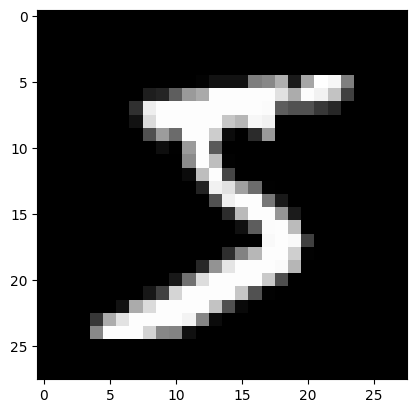

In [ ]:
#(matplotlib inline) tells notebook that we want to draw image within the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
image,label=dataset[0] #will retrice image as well as it's label
plt.imshow(image,cmap='gray') #to convert it to grayscale
print(label)

4


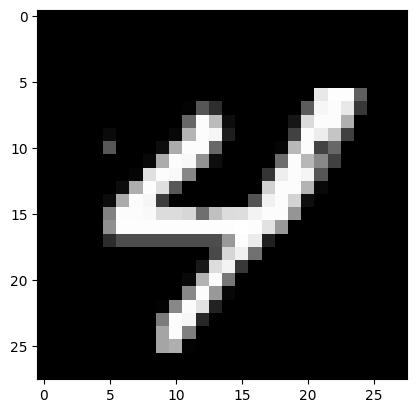

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image,label=dataset[89]
plt.imshow(image,cmap='gray')
print(label)

PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.
let's transform the image dataset into tensors and then view few values or portion of an image as well as its tensor information.

In [ ]:
import torchvision.transforms as transforms
dataset=MNIST(root='data/',transform=transforms.ToTensor())
img_tensor,label=dataset[100]
print(img_tensor.shape,label) #output 1,28,28 where 1 is color chanel and 28*28 is size of image.

torch.Size([1, 28, 28]) 5


tensor([[0.8118, 0.9922, 0.9922, 0.9020, 0.0000],
        [0.6157, 0.9922, 0.9922, 0.4902, 0.0000],
        [0.3490, 0.9922, 0.9804, 0.2235, 0.0000],
        [0.3490, 0.9922, 0.9686, 0.0000, 0.0000],
        [0.3490, 0.9922, 0.9686, 0.0000, 0.0000]])


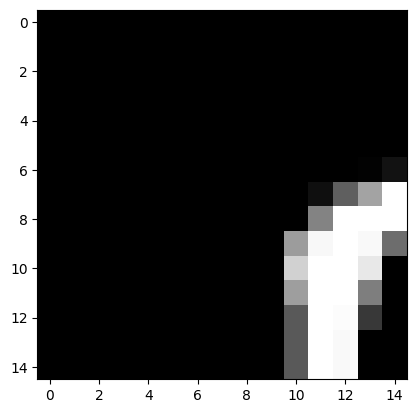

In [ ]:
#printing part of image first in tensor form and then image form
print(img_tensor[0,10:15,10:15])
plt.imshow(img_tensor[0,0:15,0:15],cmap='gray') #first argument 0 to omit first channel/dimension

Splitting data into training and evaluation sets is a fundamental practice in machine learning and data analysis for several important reasons including model evaluation ad avoiding overfitting.
let's just split our dataset: out of 60000 images we assign 50000 to training and remaining 10000 to evaluation.

In [ ]:
from torch.utils.data import random_split
train_ds,eval_ds=random_split(dataset,[50000,10000])
len(train_ds),len(eval_ds)

(50000, 10000)

in real world datasets are very large. they are loaded in batches instead of whole dataset.

We can now create data loaders to help us load the data in batches.
you can use any batch_size you want.

We'll use a batch size of 128.

In [ ]:
#dataloader helps in loading data in batches
from torch.utils.data import DataLoader
batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True)#shuffle=true is to make sure that batches generated in each epoch are different.
val_loader=DataLoader(eval_ds,batch_size)

Since nn.Linear expects each training example to be a vector, each 1x28x28 image tensor is flattened into a vector of size 784 (28*28) before being passed into the model.


The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.


In Python, a class is a blueprint or a template for creating objects (instances). It defines a set of attributes (variables) and methods (functions) that the objects of the class will have.

Classes can also build upon or extend the functionality of existing classes. Let's extend the nn.Module class from PyTorch to define a custom model.

__init__ Method:

__init__ is a special method in Python classes, also known as the constructor.
It is automatically called when an object of the class is created.
It is used to initialize the attributes of the object.

In [ ]:
import torch.nn as nn
inputs=28*28
num_classes=10
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(inputs, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784) #-1 is used to leave for pytorch to calculate the number of rows aproprietly.
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions we are passing the images to the model.
        loss = F.cross_entropy(out, labels) # Calculate loss using cross entropy
        return loss

    def accuracy(self,batch):  # this will calculate the accuracy of prediction
      images,labels=batch
      out= self(images)
      acc=accuracy(out,labels) #out and label values are passed to accuracy function
      return acc


# Create an instance of your model

model = model()


Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem.

We'll include the problem-independent parts within a function called fit, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the nn.Module class.

In [ ]:
def fit(num_epochs,model,train_loader):
  opt_func=torch.optim.SGD
  optimizer = opt_func(model.parameters(), lr=1e-5)
  for epoch in range(num_epochs):
    for batch in train_loader:

      #generate predictions and calculate loss

      loss=model.training_step(batch)

      #compute gradiant
      loss.backward()

      #update parameters using gradient
      #opt= opt(model, lr=1e-5)
      optimizer.step()

      #reset gradiant
      optimizer.zero_grad()
      acc=model.accuracy(batch)


  # Print the progress
    if (epoch+1) % 10 == 0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
      print('Accuracy',acc)

let's define the accuracy function here.
accuracy is percentage of times the model made correct prediction. we will sum the number of times when prediction was equal to label. for this we will use == operator.

 it performs element-wise comparison, resulting in a new tensor of the same shape as the input tensors, where each element is True if the corresponding elements in the input tensors are equal and False otherwise.

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

now let's just train the model for let's say 50 epochs. During training  after every iteration the weights and biases are updated to make better predictions. so loss will decrease and accuracy will increase.



In [ ]:
fit(50,model,train_loader)

Epoch [10/50], Loss: 2.3358
Accuracy tensor(0.0875)
Epoch [20/50], Loss: 2.2560
Accuracy tensor(0.1000)
Epoch [30/50], Loss: 2.2167
Accuracy tensor(0.1625)
Epoch [40/50], Loss: 2.1811
Accuracy tensor(0.3125)
Epoch [50/50], Loss: 2.1324
Accuracy tensor(0.3625)


As you can see the loss has decresed after 50 iterations. you can train it for as many epchs untill loss is not decreassing.
let's train it for few more epochs

In [ ]:
fit(100,model,train_loader)

Epoch [10/100], Loss: 2.1226
Accuracy tensor(0.4250)
Epoch [20/100], Loss: 2.0880
Accuracy tensor(0.4250)
Epoch [30/100], Loss: 2.0676
Accuracy tensor(0.4250)
Epoch [40/100], Loss: 1.9994
Accuracy tensor(0.5250)
Epoch [50/100], Loss: 2.0101
Accuracy tensor(0.5375)
Epoch [60/100], Loss: 1.9745
Accuracy tensor(0.5875)
Epoch [70/100], Loss: 1.9021
Accuracy tensor(0.6750)
Epoch [80/100], Loss: 1.9227
Accuracy tensor(0.6125)
Epoch [90/100], Loss: 1.8451
Accuracy tensor(0.6750)
Epoch [100/100], Loss: 1.8451
Accuracy tensor(0.6375)


In [ ]:
fit(100,model,train_loader)

Epoch [10/100], Loss: 1.7646
Accuracy tensor(0.7250)
Epoch [20/100], Loss: 1.7716
Accuracy tensor(0.6625)
Epoch [30/100], Loss: 1.7988
Accuracy tensor(0.6375)
Epoch [40/100], Loss: 1.7788
Accuracy tensor(0.6375)
Epoch [50/100], Loss: 1.6919
Accuracy tensor(0.7250)
Epoch [60/100], Loss: 1.6839
Accuracy tensor(0.6625)
Epoch [70/100], Loss: 1.7210
Accuracy tensor(0.6875)
Epoch [80/100], Loss: 1.6226
Accuracy tensor(0.7125)
Epoch [90/100], Loss: 1.5229
Accuracy tensor(0.7875)
Epoch [100/100], Loss: 1.6349
Accuracy tensor(0.7375)


you can see after 250 epochs the loss has reduced from 2.1  to 1.6 and accuracy has been increased from 42 percent to 73 percent

you can now train the model for more epochs to produce better results.


let's just now test our model on test data.

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


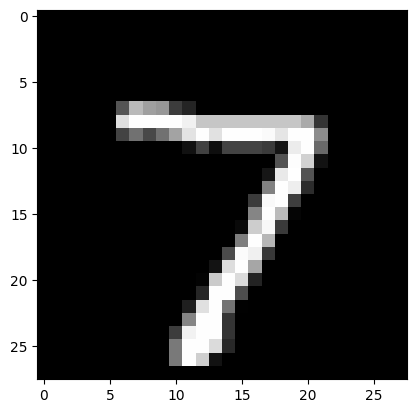

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 3 , Predicted: 3


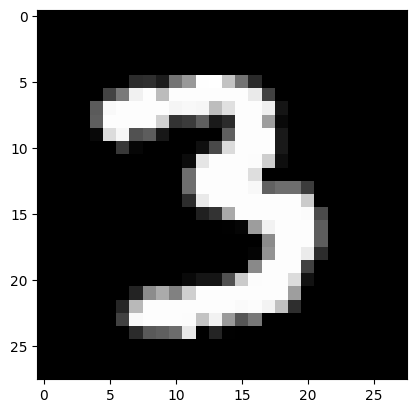

In [ ]:
img, label = test_dataset[500]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 1 , Predicted: 1


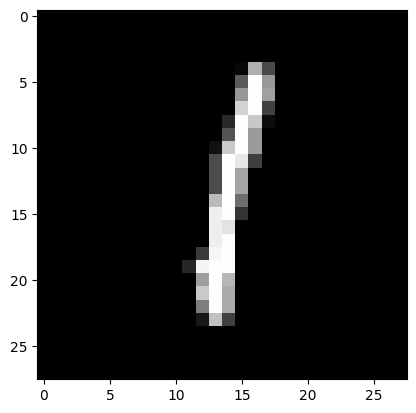

In [ ]:
img, label = test_dataset[725]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 4


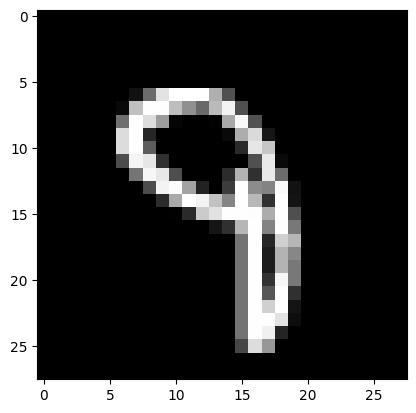

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

some of the test images are predicted correctly and some incorrectly.
the accuracy can further be increased by more training

##Saving and loading the model
Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights and bias matrices to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth') #will not save whole model but state dictionary containig weights and biases in a file named mist-logistic.pth
model.state_dict() #view the values


OrderedDict([('linear.weight',
              tensor([[-0.0261, -0.0161, -0.0297,  ..., -0.0147,  0.0199,  0.0286],
                      [ 0.0318, -0.0228, -0.0178,  ...,  0.0154,  0.0279, -0.0230],
                      [ 0.0354, -0.0018, -0.0125,  ..., -0.0309,  0.0350,  0.0132],
                      ...,
                      [-0.0100, -0.0190, -0.0111,  ...,  0.0027, -0.0126,  0.0334],
                      [-0.0224, -0.0092,  0.0312,  ...,  0.0032,  0.0293, -0.0247],
                      [ 0.0249,  0.0238,  0.0112,  ..., -0.0114,  0.0070,  0.0190]])),
             ('linear.bias',
              tensor([-0.0448,  0.0827, -0.0368, -0.0010,  0.0271,  0.0424, -0.0026,  0.0514,
                      -0.0494, -0.0190]))])